# Kunskapskontroll 1 

# Task

As a data analyst there is plenty of opportunity to improve processes or suggest improved ways of doing things. When doing so it is often very smart and efficient (time is a scarce resource) to create a POC (Proof of Concept) which basically is a small demo checking wether it is worthwile going further with something. It is also something concrete which facilitates discussions, do not underestimate the power of that. 

In this example, you are working in a company that sells houses and they have a "manual" process of setting prices by humans. You as a Data Scientist can make this process better by using Machine Learning. Your task is to create a POC that you will present to your team colleagues and use as a source of discussion of wether or not you should continue with more detailed modelling. 

Two quotes to facilitate your reflection on the value of creating a PoC: 

"*Premature optimization is the root of all evil*". 

"*Fail fast*".


**More specifially, do the following:**
1. A short EDA (Exploratory Data Analysis) of the housing data set.
2. Drop the column "ocean_proximity", then you only have numeric columns which will simplify your analysis. Remember, this is a POC!
3. Split your data into train and test set.
4. You have missing values in your data. Handle this with [ SimpleImputer(strategy="median") ], check the fantastic Scikit-learn documentation for details.
5. Create one "Linear Regression" model and one "Lasso" model. For the Lasso model, use GridSearchCV to optimize $\alpha$ values, choose yourself which $\alpha$ values to evaluate.
Use RMSE as a metric to decide which model to choose. 

7. Evaluate your chosen model on the test set using the root mean squared error (RMSE) as the metric. Conclusions? 

8. Do a short presentation (~ 2-5 min) on your POC that you present to your colleagues (no need to prepare anything particular, just talk from the code). Think of:
- What do you want to highlight/present?
- What is your conclusion?
- What could be the next step? Is the POC convincing enough or is it not worthwile continuing? Do we need to dig deeper into this before taking some decisions?

# Code

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression, Lasso

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
# Below, set your own path where you have stored the data file. 
housing = pd.read_csv(r'housing.csv')

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing = housing.drop('ocean_proximity', axis=1)

In [8]:
X = housing.drop('median_house_value', axis=1)
y = housing['median_house_value'].copy()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

## EDA

In [10]:
X_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.582290,35.643149,28.608285,2642.004784,538.496851,1426.453004,499.986919,3.880754
std,2.005654,2.136665,12.602499,2174.646744,419.007096,1137.056380,380.967964,1.904294
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.810000,33.930000,18.000000,1454.000000,296.750000,789.000000,280.000000,2.566700
50%,-118.510000,34.260000,29.000000,2129.000000,437.000000,1167.000000,410.000000,3.545800
75%,-118.010000,37.720000,37.000000,3160.000000,647.000000,1726.000000,606.000000,4.773175
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


<AxesSubplot:>

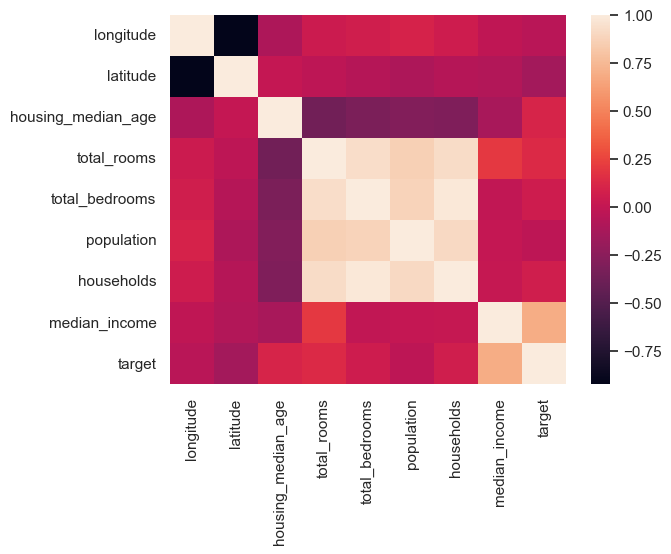

In [11]:
df = X_train.copy()
df['target'] = y_train
corr_matrix = df.corr()
sns.heatmap(corr_matrix)

## Preparing data

In [12]:
# Create pipeline
steps = [
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
]

pipeline = Pipeline(steps=steps)

In [13]:
# Fit pipeline and transform training data
X_train_prepared = pipeline.fit_transform(X_train)

## Validating models

In [14]:
# Instantiate and cross validate linear regression model

linreg = LinearRegression()
linreg_scores = cross_val_score(linreg, X_train_prepared, y_train, cv=5, scoring='neg_mean_squared_error')
linreg_rmses = np.sqrt(-linreg_scores)
print(f'Average Linear Regression RMSE: {np.mean(linreg_rmses)}')

Average Linear Regression RMSE: 69532.25257997937


In [21]:
# Instantiate Lasso model, find best alpha value using GridSearch

lasso = Lasso()
params = {
    'alpha': [1, 10, 41, 50]
}
lasso_reg = GridSearchCV(lasso, params, cv=5)
lasso_reg.fit(X_train_prepared, y_train)

print(lasso_reg.best_params_)

{'alpha': 41}


In [2]:
# Cross validate Lasso model

lasso_reg_scores = cross_val_score(lasso_reg, X_train_prepared, y_train, cv=3, scoring='neg_mean_squared_error')
lasso_reg_rmses = np.sqrt(-lasso_reg_scores)
print(f'Average Lasso RMSE: {np.mean(lasso_reg_rmses)}')

NameError: name 'cross_val_score' is not defined

### Findings
The Lasso model performs ever so slightly better than the Linear regression model with a difference of $13.14$.

The Lasso model will be used to predict against the test data.

## Final testing of models

In [24]:
# Transform the test data

X_test_prepared = pipeline.transform(X_test)

In [27]:
# Predict using Lasso model

lasso_pred = lasso_reg.predict(X_test_prepared)
lasso_RMSE = mean_squared_error(y_test, lasso_pred, squared=False)

print(lasso_RMSE)
print(lasso_RMSE/y_test.mean())

71107.85623127106
0.3460231099996609


### Quick conclusion
The lasso model performs ever so slightly better than the linear regression model.

However, the RMSE of the model is a bit over $70000, which is about 35% of the mean house value. Further steps to fine tune the model could be taken.